# order of exercise
#### 1. Understanding the Data
#### 2. Reading the data in
#### 3. Data Exploration
#### 4. Simple Regression Model

# import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

%matplotlib inline


# Get the Data inside of jupyter

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/JonathanBanda/Regression-Machine-Learning-/master/Simple%20Linear%20Regression/FuelConsumptionCo2.csv')

# Data Exploration

In [8]:
df.head()

# Now lets get a description of the data

df.describe()

## we see that there are 1067 rows

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# exploring the features 
### **ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB, CO2EMISSIONS**

In [12]:
selected_features = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

selected_features.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


## Now lets plot these in histogram form

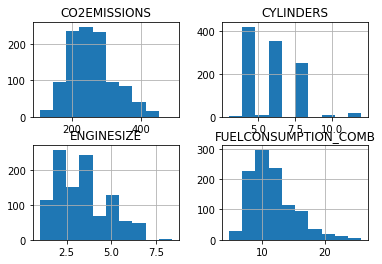

In [15]:
selected_features.hist()
plt.show()

## Now, lets plot each of these features vs the Emission, to see how linear is their relation:


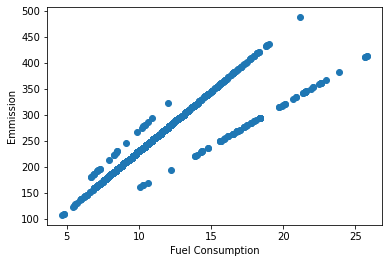

In [23]:
# fuel consumption vs emmision
plt.scatter(selected_features.FUELCONSUMPTION_COMB, selected_features.CO2EMISSIONS)
plt.xlabel('Fuel Consumption')
plt.ylabel('Emmission')
plt.show()

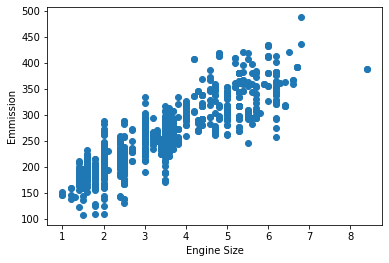

In [24]:
# Engine size vs Emmision
plt.scatter(selected_features.ENGINESIZE, selected_features.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('Emmission')
plt.show()

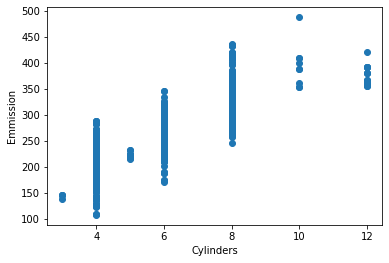

In [26]:
# Cylinders vs Emmission
plt.scatter(selected_features.CYLINDERS, selected_features.CO2EMISSIONS)
plt.xlabel('Cylinders')
plt.ylabel('Emmission')
plt.show()

# After exploring the data we can begin to train and test

### We need to split the data set

In [29]:
# using the numpy we select a random subset of ROWS in our data (df)
# 80% to train and 20% to test

random_ROWS = np.random.rand(len(df)) < 0.8
train = selected_features[random_ROWS]
test = selected_features[~random_ROWS]


#### Train Scatter

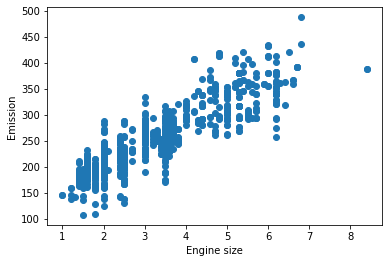

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# looks the same as before

# Modeling

In [35]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(train_x, train_y)

# The coefficients FOR THEATA 0 AND THEATA 1

print ('Coefficients: ', regression.coef_)
print ('Intercept: ',regression.intercept_)

Coefficients:  [[39.39365651]]
Intercept:  [124.83191406]


Text(0, 0.5, 'Emission')

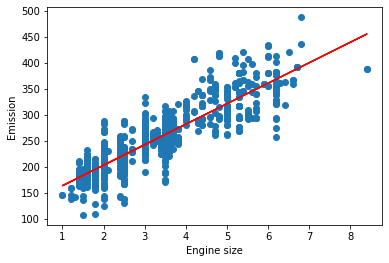

In [38]:
## we can plot the newly fitted line onto our previos graph

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
# above shows the equation y(hat) = theata0 + theata1 * x(array) in reverse order
plt.xlabel("Engine size")
plt.ylabel("Emission")



# Model Evaluation

In [42]:
# using MSE and R^2 to meaeasue the accuracy of our model

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 21.98
Residual sum of squares (MSE): 822.95
R2-score: 0.72
